In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
#gathering of data
data=pd.read_csv("/content/drive/MyDrive/HeartDiseaseTrain-Test.csv")

In [ ]:
data.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [ ]:
data['chest_pain_type'].value_counts()

Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: chest_pain_type, dtype: int64

In [ ]:
data['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [ ]:
data[data['cholestoral']< 200]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
10,71,Female,Typical angina,112,149,Lower than 120 mg/ml,ST-T wave abnormality,125,No,1.6,Flat,Zero,Fixed Defect,1
20,60,Male,Non-anginal pain,140,185,Lower than 120 mg/ml,Normal,155,No,3.0,Flat,Zero,Fixed Defect,0
30,44,Male,Typical angina,120,169,Lower than 120 mg/ml,ST-T wave abnormality,144,Yes,2.8,Upsloping,Zero,Normal,0
32,57,Male,Typical angina,130,131,Lower than 120 mg/ml,ST-T wave abnormality,115,Yes,1.2,Flat,One,Reversable Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0
1007,56,Male,Asymptomatic,120,193,Lower than 120 mg/ml,Normal,162,No,1.9,Flat,Zero,Reversable Defect,1
1014,44,Female,Non-anginal pain,108,141,Lower than 120 mg/ml,ST-T wave abnormality,175,No,0.6,Flat,Zero,Fixed Defect,1
1018,41,Male,Typical angina,110,172,Lower than 120 mg/ml,Normal,158,No,0.0,Downsloping,Zero,Reversable Defect,0


In [ ]:
data[data['cholestoral']>50].astype(string) &  data[data['age']>70]

NameError: name 'string' is not defined

NameError: name 'string' is not defined

In [ ]:
print(data['age'].dtype)
data['age'] = data['age'].astype(str)
data[data['age'].str.contains('pattern')]


int64


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target


In [ ]:
data[data['sex'].str.contains ('pattern')]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target


In [ ]:
data[int(10.0)].nlargest(10, 'resting_blood_pressure')

KeyError: 10

In [ ]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [ ]:
y=data.target.values
x_data=data.drop(['target','thalassemia','vessels_colored_by_flourosopy','slope','exercise_induced_angina','rest_ecg','fasting_blood_sugar','chest_pain_type','sex'],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
#preparing of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
data.groupby('age').size()

age
29     4
34     6
35    15
37     6
38    12
39    14
40    11
41    32
42    26
43    26
44    36
45    25
46    23
47    18
48    23
49    17
50    21
51    39
52    43
53    26
54    53
55    30
56    39
57    57
58    68
59    46
60    37
61    31
62    37
63    32
64    34
65    27
66    25
67    31
68    12
69     9
70    14
71    11
74     3
76     3
77     3
dtype: int64

In [ ]:
data.groupby('age').mean()

<ipython-input-35-04a3fb9e1b33>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('age').mean()


,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
age,,,,,
29,130.000000,204.000000,202.000000,0.000000,1.000000
34,118.000000,196.000000,183.000000,0.350000,1.000000
35,126.533333,209.200000,160.800000,0.800000,0.533333
37,125.000000,232.500000,178.500000,1.750000,1.000000
38,132.000000,193.666667,176.000000,1.266667,0.666667
39,123.285714,236.857143,160.785714,0.342857,0.714286
40,133.454545,196.090909,155.818182,1.109091,0.272727
41,119.531250,218.156250,164.218750,0.318750,0.906250
42,127.461538,246.807692,158.500000,0.530769,0.846154


In [ ]:
data.groupby('age').agg(['mean', 'sum', 'min', 'max'])


<ipython-input-36-1d3837a4a2f9>:1: FutureWarning: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('age').agg(['mean', 'sum', 'min', 'max'])


resting_blood_pressure                 cholestoral                   \
                      mean   sum  min  max        mean    sum  min  max   
age                                                                       
29              130.000000   520  130  130  204.000000    816  204  204   
34              118.000000   708  118  118  196.000000   1176  182  210   
35              126.533333  1898  120  138  209.200000   3138  183  282   
37              125.000000   750  120  130  232.500000   1395  215  250   
38              132.000000  1584  120  138  193.666667   2324  175  231   
39              123.285714  1726   94  140  236.857143   3316  199  321   
40              133.454545  1468  110  152  196.090909   2157  167  223   
41              119.531250  3825  105  135  218.156250   6981  157  306   
42              127.461538  3314  102  148  246.807692   6417  180  315   
43              126.346154  3285  110  150  256.923077   6680  177  341   
44              120.666667  4344  108  140  220.000000   7920  141  290   
45              122.680000  3067  104  142  246.840000   6171  160  309   
46              128.173913  2948  101  150  234.608696   5396  177  311   
47              119.000000  2142  108  138  248.166667   4467  204  275   
48              123.913043  2850  110  130  250.130435   5753  222  275   
49              125.529412  2134  118  134  221.529412   3766  149  271   
50              130.428571  2739  110  150  227.000000   4767  196  254   
51              123.487179  4816   94  140  257.948718  10060  175  308   
52              129.767442  5580  108  172  226.348837   9733  186  325   
53              132.538462  3446  123  142  234.192308   6089  197  282   
54              127.698113  6768  108  192  253.905660  13457  188  309   
55              142.766667  4283  128  180  282.266667   8468  205  353   
56              135.333333  5278  120  200  258.871795  10096  184  409   
57              136.315789  7770  110  165  241.877193  13787  126  354   
58              128.397059  8731  100  170  253.794118  17258  197  340   
59              148.630435  6837  110  178  238.282609  10961  176  326   
60              132.000000  4884  102  150  245.189189   9072  178  318   
61              137.741935  4270  120  150  243.774194   7557  166  330   
62              133.891892  4954  120  160  256.486486   9490  164  394   
63              133.250000  4264  108  150  263.093750   8419  187  407   
64              138.794118  4719  110  180  274.970588   9349  211  335   
65              138.777778  3747  110  160  276.185185   7457  177  417   
66              146.960000  3674  112  178  244.240000   6106  212  302   
67              129.096774  4002  100  160  280.870968   8707  212  564   
68              140.500000  1686  118  180  238.750000   2865  193  277   
69              146.666667  1320  140  160  242.333333   2181  234  254   
70              146.285714  2048  130  160  251.857143   3526  174  322   
71              124.363636  1368  110  160  232.909091   2562  149  302   
74              120.000000   360  120  120  269.000000    807  269  269   
76              140.000000   420  140  140  197.000000    591  197  197   
77              125.000000   375  125  125  304.000000    912  304  304   

    Max_heart_rate                    oldpeak                    target      \
              mean    sum  min  max      mean   sum  min  max      mean sum   
age                                                                           
29      202.000000    808  202  202  0.000000   0.0  0.0  0.0  1.000000   4   
34      183.000000   1098  174  192  0.350000   2.1  0.0  0.7  1.000000   6   
35      160.800000   2412  130  182  0.800000  12.0  0.0  1.6  0.533333   8   
37      178.500000   1071  170  187  1.750000  10.5  0.0  3.5  1.000000   6   
38      176.000000   2112  173  182  1.266667  15.2  0.0  3.8  0.666667   8   
39      160.785714   2251  140  182  0.342857   4.8  0.0  1.2  0.714286

In [ ]:
data.groupby(['age', 'Max_heart_rate']).mean()

<ipython-input-37-b16d3a615196>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['age', 'Max_heart_rate']).mean()


resting_blood_pressure  cholestoral  oldpeak  target
age Max_heart_rate                                                      
29  202                              130.0        204.0      0.0     1.0
34  174                              118.0        182.0      0.0     1.0
    192                              118.0        210.0      0.7     1.0
35  130                              120.0        198.0      1.6     0.0
    156                              126.0        282.0      0.0     0.0
...                                    ...          ...      ...     ...
71  130                              110.0        265.0      0.0     1.0
    162                              160.0        302.0      0.4     1.0
74  121                              120.0        269.0      0.2     1.0
76  116                              140.0        197.0      1.1     1.0
77  162                              125.0        304.0      0.0     0.0

[291 rows x 4 columns]

from matplotlib import pyplot as plt
_df_0['resting_blood_pressure'].plot(kind='hist', bins=20, title='resting_blood_pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cholestoral'].plot(kind='hist', bins=20, title='cholestoral')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['oldpeak'].plot(kind='hist', bins=20, title='oldpeak')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='resting_blood_pressure', y='cholestoral', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='cholestoral', y='oldpeak', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='oldpeak', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['resting_blood_pressure'].plot(kind='line', figsize=(8, 4), title='resting_blood_pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['cholestoral'].plot(kind='line', figsize=(8, 4), title='cholestoral')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['oldpeak'].plot(kind='line', figsize=(8, 4), title='oldpeak')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

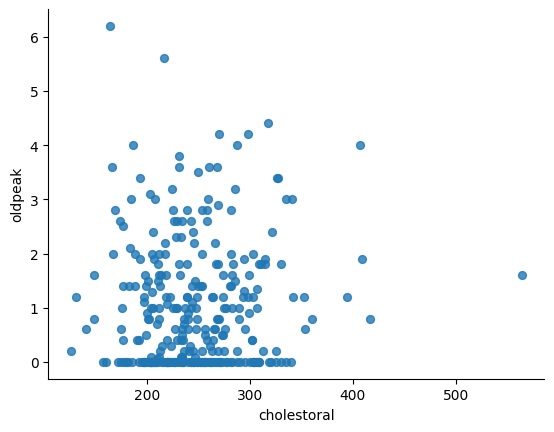

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='cholestoral', y='oldpeak', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

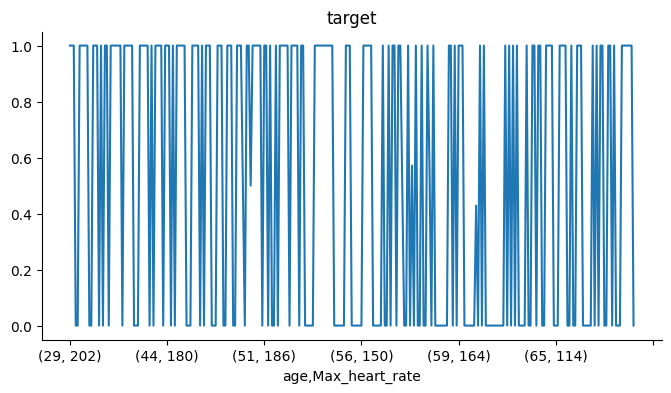

In [ ]:
from matplotlib import pyplot as plt
_df_10['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

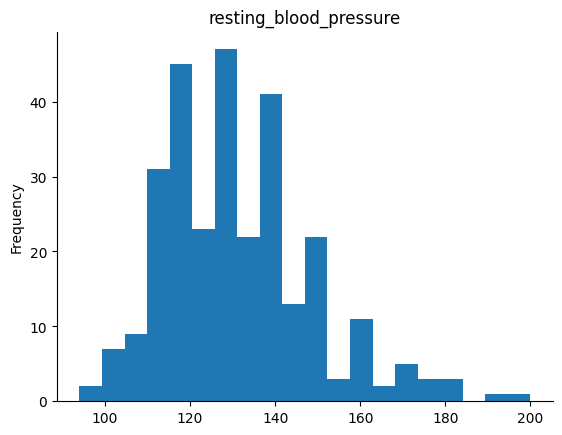

In [ ]:
from matplotlib import pyplot as plt
_df_0['resting_blood_pressure'].plot(kind='hist', bins=20, title='resting_blood_pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-42-0ff160eedb13>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'age']).sum()['target'].unstack().plot.bar()


<Axes: xlabel='cholestoral'>

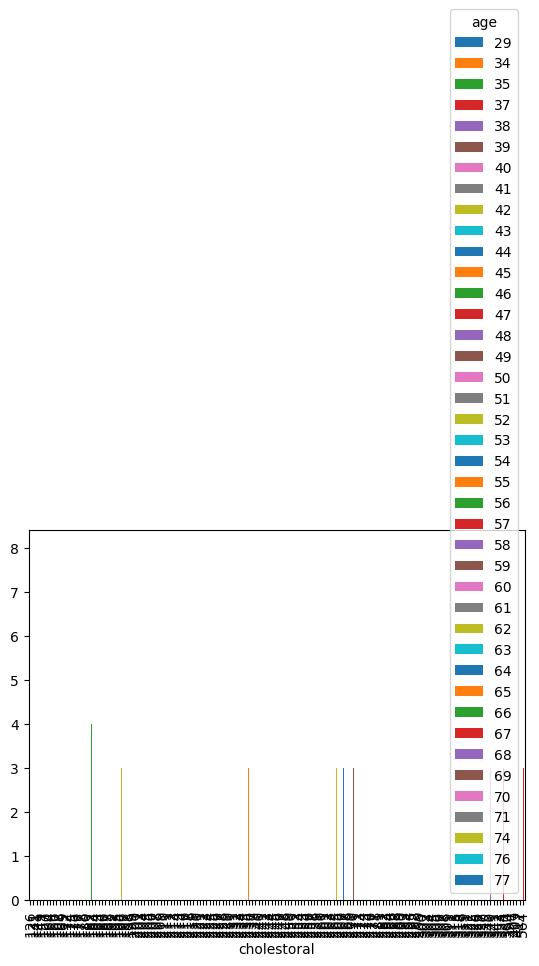

In [ ]:
data.groupby(['cholestoral',
'age']).sum()['target'].unstack().plot.bar()


In [ ]:
x_train.shape

(820, 5)

In [ ]:
y_train.shape

(820,)

In [ ]:
y_train.T.shape

(820,)

In [ ]:
x_train.T.shape

(5, 820)

In [ ]:
x_train


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
315,0.270833,0.509434,0.269406,0.816794,0.129032
204,0.770833,0.490566,0.347032,0.618321,0.000000
363,0.500000,0.339623,0.273973,0.778626,0.000000
5,0.604167,0.056604,0.278539,0.389313,0.161290
1017,0.500000,0.273585,0.356164,0.183206,0.322581
...,...,...,...,...,...
835,0.416667,0.226415,0.052511,0.419847,0.129032
192,0.791667,0.198113,1.000000,0.679389,0.258065
629,0.750000,0.415094,0.356164,0.786260,0.225806
559,0.791667,0.245283,0.253425,0.000000,0.161290


In [ ]:
y_train

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
#logistic regression
log=LogisticRegression()
log.fit(x_train,y_train) #training of model
print('Test accuracy of Logistic regression: {}'.format(log.score(x_test,y_test)*100))

Test accuracy of Logistic regression: 78.53658536585367


In [ ]:
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print('Test accuracy of KNN regression: {}'.format(knn.score(x_test,y_test)*100))


Test accuracy of KNN regression: 95.1219512195122


Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0
Test accuracy of KNN regression: 100.0


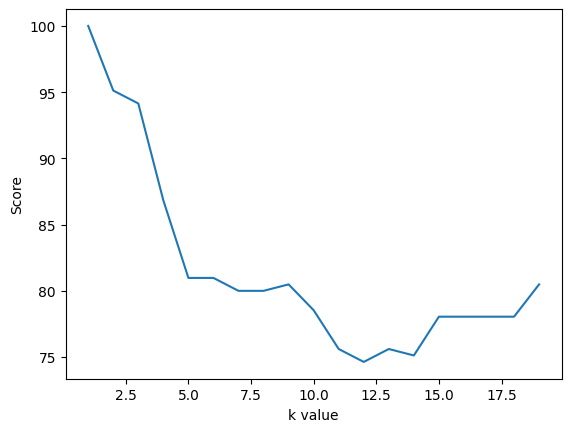

In [ ]:

scorelist=[]
for i in range(1,20):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    scorelist.append(knn.score(x_test,y_test)*100)
    print('Test accuracy of KNN regression: {}'.format(max(scorelist)))
plt.plot(range(1,20),scorelist)
plt.xlabel('k value')
plt.ylabel('Score')
plt.show()

In [ ]:
scorelist

[100.0,
 95.1219512195122,
 94.14634146341463,
 86.82926829268293,
 80.97560975609757,
 80.97560975609757,
 80.0,
 80.0,
 80.48780487804879,
 78.53658536585367,
 75.60975609756098,
 74.63414634146342,
 75.60975609756098,
 75.1219512195122,
 78.04878048780488,
 78.04878048780488,
 78.04878048780488,
 78.04878048780488,
 80.48780487804879]

In [ ]:
#support vector machine
svm= SVC(random_state=1)
svm.fit(x_train,y_train)
print('Test accuracy of svm regression: {}'.format(svm.score(x_test,y_test)*100))

Test accuracy of svm regression: 80.97560975609757


In [ ]:
#naive bayes algorithm
o=GaussianNB()
o.fit(x_train,y_train)
print('Test accuracy of naive bayes : {}'.format(o.score(x_test,y_test)*100))

Test accuracy of naive bayes : 78.53658536585367


In [ ]:
#decision tree
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print('Test accuracy of decision tree algorithm: {}'.format(dtc.score(x_test,y_test)*100))

Test accuracy of decision tree algorithm: 100.0


In [ ]:
#random forest
r=RandomForestClassifier(n_estimators=1000,random_state=1)
r.fit(x_train,y_train)
print('Test accuracy of random forest algorithm: {}'.format(r.score(x_test,y_test)*100))

Test accuracy of random forest algorithm: 100.0


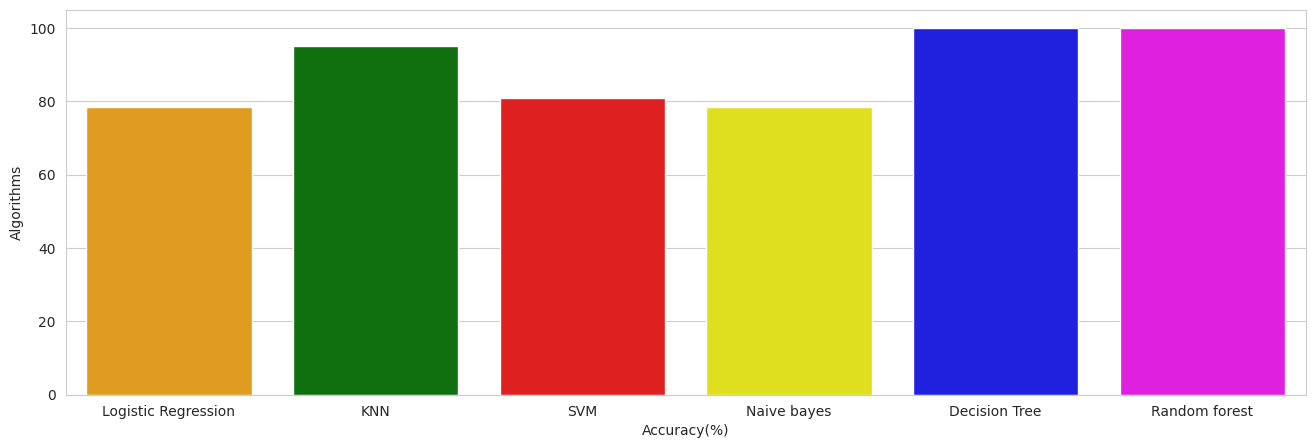

In [ ]:
m=['Logistic Regression','KNN','SVM','Naive bayes','Decision Tree','Random forest']
accuracy=[78.53,95.12,80.97,78.53,100.0,100.0]
colors=['orange','green','red','yellow','blue','magenta']
sb.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.xlabel('Accuracy(%)')
plt.ylabel('Algorithms')
sb.barplot(x=m,y=accuracy,palette=colors)
plt.show()